In [ ]:
import os
import random

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.nn.functional as F
import torchaudio.transforms as T
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader

from time import time
from tqdm import tqdm

from src import model as m                  # Config
from src.data import SpectrogramDataset     # Torch dataset object creator
from src.utils.helpers import *             # Helpers to build, train and evaluate the model. See `src/utils/helpers.py`


import random
import numpy as np
import torch

set_seed()

In [ ]:
# 1. init model
model = build_model(m.config, input_h=96, input_w=64)



# 2. Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



# 3. DataLoaders
dataset = SpectrogramDataset(csv_file=r"data\labels\final_labels.csv")
train_loader, val_loader = get_loaders(dataset)



# 4. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=m.config['lr'])



# 5. Training loop
for epoch in range(10):
    start_time = time()
    avg_loss, per_class_loss, class_counts = train_one_epoch(model, train_loader, optimizer, criterion, device)
    duration = time() - start_time

    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f} — Time: {duration:.2f}s")

    # Print per-class losses and sample counts seen this epoch
    print("Per-class training loss (avg per-sample) and counts:")
    for cls in sorted(per_class_loss.keys()):
        loss_val = per_class_loss[cls]
        cnt = class_counts[cls]
        if loss_val is None:
            print(f"  Class {cls}: no samples")
        else:
            print(f"  Class {cls}: loss={loss_val:.4f} (n={cnt})")
    print("-" * 60)



# 6. Final Validation 
acc = validate(model, val_loader, device)
print(f"Validation Accuracy: {acc:.2%}")



# 7. Save model
torch.save(model.state_dict(), r'src/model/ConvCount_full.pt')

Training: 100%|██████████| 2907/2907 [24:54<00:00,  1.95batch/s]


Epoch 1 — Loss: 0.7588 — Time: 1494.42s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.1034 (n=9434)
  Class 1: loss=0.1832 (n=23451)
  Class 2: loss=1.2923 (n=20173)
  Class 3: loss=1.0163 (n=19987)
  Class 4: loss=0.9475 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [40:09<00:00,  1.21batch/s]


Epoch 2 — Loss: 0.7077 — Time: 2409.25s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0410 (n=9434)
  Class 1: loss=0.1481 (n=23451)
  Class 2: loss=1.2009 (n=20173)
  Class 3: loss=0.9904 (n=19987)
  Class 4: loss=0.8985 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [37:23<00:00,  1.30batch/s]


Epoch 3 — Loss: 0.6877 — Time: 2243.86s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0314 (n=9434)
  Class 1: loss=0.1333 (n=23451)
  Class 2: loss=1.1614 (n=20173)
  Class 3: loss=0.9758 (n=19987)
  Class 4: loss=0.8819 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [37:12<00:00,  1.30batch/s]


Epoch 4 — Loss: 0.6757 — Time: 2232.89s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0264 (n=9434)
  Class 1: loss=0.1230 (n=23451)
  Class 2: loss=1.1328 (n=20173)
  Class 3: loss=0.9705 (n=19987)
  Class 4: loss=0.8746 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [36:51<00:00,  1.31batch/s]


Epoch 5 — Loss: 0.6670 — Time: 2211.15s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0256 (n=9434)
  Class 1: loss=0.1149 (n=23451)
  Class 2: loss=1.1150 (n=20173)
  Class 3: loss=0.9647 (n=19987)
  Class 4: loss=0.8679 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [23:37<00:00,  2.05batch/s]


Epoch 6 — Loss: 0.6589 — Time: 1417.16s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0219 (n=9434)
  Class 1: loss=0.1087 (n=23451)
  Class 2: loss=1.0986 (n=20173)
  Class 3: loss=0.9575 (n=19987)
  Class 4: loss=0.8627 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [12:21<00:00,  3.92batch/s]


Epoch 7 — Loss: 0.6538 — Time: 741.09s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0203 (n=9434)
  Class 1: loss=0.1046 (n=23451)
  Class 2: loss=1.0849 (n=20173)
  Class 3: loss=0.9558 (n=19987)
  Class 4: loss=0.8602 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [20:24<00:00,  2.37batch/s]


Epoch 8 — Loss: 0.6481 — Time: 1224.24s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0208 (n=9434)
  Class 1: loss=0.1013 (n=23451)
  Class 2: loss=1.0719 (n=20173)
  Class 3: loss=0.9500 (n=19987)
  Class 4: loss=0.8565 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [21:52<00:00,  2.21batch/s]


Epoch 9 — Loss: 0.6431 — Time: 1312.47s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0182 (n=9434)
  Class 1: loss=0.0972 (n=23451)
  Class 2: loss=1.0593 (n=20173)
  Class 3: loss=0.9478 (n=19987)
  Class 4: loss=0.8540 (n=19978)
------------------------------------------------------------


Training: 100%|██████████| 2907/2907 [26:41<00:00,  1.82batch/s]


Epoch 10 — Loss: 0.6385 — Time: 1601.36s
Per-class training loss (avg per-sample) and counts:
  Class 0: loss=0.0201 (n=9434)
  Class 1: loss=0.0928 (n=23451)
  Class 2: loss=1.0499 (n=20173)
  Class 3: loss=0.9440 (n=19987)
  Class 4: loss=0.8498 (n=19978)
------------------------------------------------------------
Validation Accuracy: 65.09%


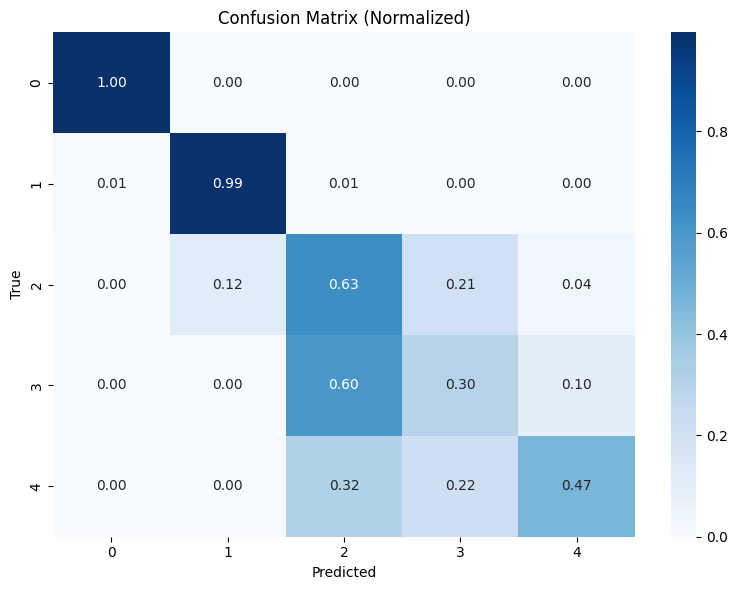


Per-Class Accuracy:
  Class 0: 0.996
  Class 1: 0.989
  Class 2: 0.635
  Class 3: 0.300
  Class 4: 0.466

Precision / Recall / F1 Score per Class:
  Class 0: Precision=0.986, Recall=0.996, F1=0.991
  Class 1: Precision=0.906, Recall=0.989, F1=0.946
  Class 2: Precision=0.410, Recall=0.635, F1=0.498
  Class 3: Precision=0.414, Recall=0.300, F1=0.348
  Class 4: Precision=0.765, Recall=0.466, F1=0.579


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def evaluate_classification(y_true, y_pred, class_labels=None, normalize_cm=False):
    """
    Computes and visualizes confusion matrix, per-class accuracy, and precision/recall/F1.

    Args:
        y_true (array-like): Ground truth labels (integers).
        y_pred (array-like): Predicted labels (integers).
        class_labels (list[int], optional): List of integer class labels (e.g., [0,1,2,3,4]).
            If None, it's inferred from y_true and y_pred.
        normalize_cm (bool): Whether to normalize confusion matrix rows.

    Returns:
        dict: Dictionary containing metrics and the confusion matrix.
    """
    metrics = {}

    # Infer class labels if not provided
    if class_labels is None:
        unique = set(np.unique(y_true)).union(np.unique(y_pred))
        class_labels = sorted(int(x) for x in unique)

        # If predictions/targets don't include all expected classes (e.g., want 0..4),
        # a caller can pass class_labels explicitly. We keep inference conservative.

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    if normalize_cm:
        # avoid divide-by-zero rows
        with np.errstate(all='ignore'):
            cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
            cm = np.nan_to_num(cm)  # convert NaNs to 0 for empty rows

    metrics['confusion_matrix'] = cm
    metrics['class_labels'] = class_labels

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize_cm else "d",
                xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix" + (" (Normalized)" if normalize_cm else ""))
    plt.tight_layout()
    plt.show()

    # Per-Class Accuracy
    per_class_acc = {}
    for cls in class_labels:
        cls_mask = np.array(y_true) == cls
        if cls_mask.sum() == 0:
            per_class_acc[cls] = None
        else:
            acc = accuracy_score(np.array(y_true)[cls_mask], np.array(y_pred)[cls_mask])
            per_class_acc[cls] = acc
    metrics['per_class_accuracy'] = per_class_acc

    print("\nPer-Class Accuracy:")
    for cls in class_labels:
        acc = per_class_acc[cls]
        if acc is None:
            print(f"  Class {cls}: (no true samples)")
        else:
            print(f"  Class {cls}: {acc:.3f}")

    # Precision, Recall, F1 Score
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=class_labels, zero_division=0
    )
    metrics['precision'] = dict(zip(class_labels, precision))
    metrics['recall'] = dict(zip(class_labels, recall))
    metrics['f1_score'] = dict(zip(class_labels, f1))

    print("\nPrecision / Recall / F1 Score per Class:")
    for cls in class_labels:
        print(f"  Class {cls}: Precision={metrics['precision'][cls]:.3f}, "
              f"Recall={metrics['recall'][cls]:.3f}, F1={metrics['f1_score'][cls]:.3f}")

    return metrics


def evaluate_model_metrics(model, loader, device, class_labels=None):
    """
    Run model on loader and evaluate. class_labels is optional (list of ints).
    If class_labels is None it will be inferred from the data (y_true/y_pred).
    """
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            logits = model(x)
            preds = logits.argmax(dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(y.cpu().numpy())

    y_true = np.array(y_true, dtype=int)
    y_pred = np.array(y_pred, dtype=int)

    # If user passed class_labels, use that; otherwise infer a sensible range
    if class_labels is None:
        # infer from data; but ensure we include 0..max if that's expected:
        max_label = max(y_true.max() if y_true.size else -1, y_pred.max() if y_pred.size else -1)
        class_labels = list(range(max_label + 1)) if max_label >= 0 else []

    return evaluate_classification(y_true, y_pred, class_labels=class_labels, normalize_cm=True)


# Usage example (simple):
metrics = evaluate_model_metrics(model, val_loader, device)
# or to force classes 0..4:
# metrics = evaluate_model_metrics(model, val_loader, device, class_labels=[0,1,2,3,4])
